## MongoDB

#### Iniciar cliente de mongo e importar librerías

In [1]:
import pymongo
import folium
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient
warnings.filterwarnings('ignore')

connection = MongoClient('localhost', 27017)
db = connection.twitter
collection = db.tweets

print(collection.count(), 'documents')

966 documents


#### Los 10 tweets con más retweets

In [2]:
pipeline = [
    {'$project': 
      {
        'id': '$id_str', 'text': '$text', 'user': '$user.screen_name',
        'retweet_count': {'$toInt': '$retweet_count'},
        'created_at': {'$dateFromString': {'dateString': '$created_at'}}
      }
    }, 
    {'$sort': {'retweet_count': -1}},
    {'$limit': 10}
]
max_retweets = collection.aggregate(pipeline)
data = pd.DataFrame(list(max_retweets), columns=['id', 'user', 'text', 'retweet_count', 'created_at'])
data

,id,user,text,retweet_count,created_at
0,594163852109094912,zeldman,RT @alex_macdonald: I will fight to support th...,9132,2015-05-01 15:37:56
1,594153080976998400,zeldman,RT @EliLanger: There are 2 kinds of people in ...,4061,2015-05-01 14:55:07
2,592371151445307392,ChelseaFC,FULL-TIME: Arsenal 0-0 @ChelseaFC. #CFCLive #A...,3804,2015-04-26 16:54:22
3,594153610633699329,cnnbrk,"Meet Marilyn Mosby, the state's attorney who c...",3134,2015-05-01 14:57:14
4,592383051004542976,ChelseaFC,Mourinho on Arsenal fans' chants: 'Boring is 1...,2610,2015-04-26 17:41:39
5,592366832457220096,cnnbrk,The overall death toll in the #NepalQuake has ...,2146,2015-04-26 16:37:13
6,592371156625141760,premierleague,FULL-TIME Arsenal 0-0 Chelsea. The Blues need ...,2069,2015-04-26 16:54:24
7,591993187629211648,FCBarcelona,FULL TIME: There's the final whistle! #Messi &...,1810,2015-04-25 15:52:29
8,592030680009330689,FCBarcelona,"RT @JordiAlba: Hoy día especial,un año que se ...",1793,2015-04-25 18:21:28
9,592028831566921729,FCBarcelona,RT @3gerardpique: Gran victoria en Cornellà! S...,1661,2015-04-25 18:14:07


#### Los 10 tweets con más favoritos

In [3]:
pipeline = [
    {'$project': 
      {
        'id': '$id_str', 'text': '$text', 'user': '$user.screen_name',
        'favorite_count': {'$toInt': '$favorite_count'},
        'created_at': {'$dateFromString': {'dateString': '$created_at'}}
      }
    }, 
    {'$sort': {'favorite_count': -1}},
    {'$limit': 10}
]
max_favorites = collection.aggregate(pipeline)
data = pd.DataFrame(list(max_favorites), columns=['id', 'user', 'text', 'favorite_count', 'created_at'])
data

,id,user,text,favorite_count,created_at
0,592025821428191232,ultrAslan,SEN ŞAMPİYON OLACAKSINNNNNNNN! \nSENİ SEVMEYEN...,1748,2015-04-25 18:02:09
1,594153610633699329,cnnbrk,"Meet Marilyn Mosby, the state's attorney who c...",1721,2015-05-01 14:57:14
2,592030833319501824,instagram,Following the journey of two creatives and the...,1494,2015-04-25 18:22:04
3,594162319355158528,RT_Erdogan,"Eskiler, önce yoldaş sonra yol derdi. Eğer iyi...",1311,2015-05-01 15:31:50
4,592383051004542976,ChelseaFC,Mourinho on Arsenal fans' chants: 'Boring is 1...,1105,2015-04-26 17:41:39
5,592371151445307392,ChelseaFC,FULL-TIME: Arsenal 0-0 @ChelseaFC. #CFCLive #A...,1099,2015-04-26 16:54:22
6,592025253620101120,SabriReyiziniz,4ncü hakem uzatmayı gösterdi :( http://t.co/OP...,1092,2015-04-25 17:59:54
7,591993187629211648,FCBarcelona,FULL TIME: There's the final whistle! #Messi &...,1011,2015-04-25 15:52:29
8,592022338566234112,SabriReyiziniz,Emre Güral Volkan'ı kötürüm bıraktı :(,854,2015-04-25 17:48:19
9,592366832457220096,cnnbrk,The overall death toll in the #NepalQuake has ...,840,2015-04-26 16:37:13


#### Ver tweets del usuario @CsharpCorner

In [4]:
pipeline = [
    {'$match': {'user.screen_name': 'CsharpCorner'}},
    {'$project': 
      {
        'id': '$id_str', 'text': '$text',
        'retweet_count': {'$toInt': '$retweet_count'},
        'favorite_count': {'$toInt': '$favorite_count'},
        'created_at': {'$dateFromString': {'dateString': '$created_at'}}
      }
    }, 
    {'$sort': {'created_at': -1}}
]
user_tweets = collection.aggregate(pipeline)
data = pd.DataFrame(list(user_tweets), columns=['id', 'text', 'retweet_count', 'favorite_count', 'created_at'])
data

,id,text,retweet_count,favorite_count,created_at
0,594787680254238720,MVC For Beginners: How to Save Record Using MV...,0,1,2015-05-03 08:56:48
1,594762014037180416,Learn Series of How to Crack Coding Interview ...,3,3,2015-05-03 07:14:48
2,594754412456775681,RT @dbeniwal21: Free Ebook by @ksr007 Basic SQ...,5,0,2015-05-03 06:44:36
3,594165671182802945,Are you ready &amp; #Excited for #Day3 #Build2...,20,4,2015-05-01 15:45:09
4,594165361857069056,#MicrosoftBand SDK Available Now by @mcbeniwal...,19,4,2015-05-01 15:43:55
5,594165244273922048,#Build2015 Day3: About to start @CsharpCorner ...,18,5,2015-05-01 15:43:27
6,592383013217939457,RT @mcbeniwal: Good #advice by @AnilAwadh on c...,1,0,2015-04-26 17:41:30
7,592025506049961985,#Xamarin Guide 8: Change the App.cs to App.xam...,0,0,2015-04-25 18:00:54
8,591995296189534208,ServiceController Class in Windows Service by ...,2,0,2015-04-25 16:00:52


#### Ver tweets con hashtag #Baltimore

In [5]:
pipeline = [
    {'$match': {'text': {'$regex': '#Baltimore'}}},
    {'$project': 
      {
        'id': '$id_str', 'text': '$text',
        'retweet_count': {'$toInt': '$retweet_count'},
        'favorite_count': {'$toInt': '$favorite_count'},
        'created_at': {'$dateFromString': {'dateString': '$created_at'}}
      }
    }, 
    {'$sort': {'created_at': -1}}
]
hashtag_tweets = collection.aggregate(pipeline)
data = pd.DataFrame(list(hashtag_tweets), columns=['id', 'text', 'retweet_count', 'favorite_count', 'created_at'])
data

,id,text,retweet_count,favorite_count,created_at
0,594164218674294784,#Baltimore reacts to charges against six polic...,12,2,2015-05-01 15:39:23
1,594160878444015618,"RT @BBCNewsUS: #Baltimore police union says ""n...",76,0,2015-05-01 15:26:07
2,594157349679464450,#Baltimore State's attorney says all 6 officer...,45,28,2015-05-01 15:12:05
3,594154688720830464,MORE: 6 #Baltimore officers charged in #Freddi...,68,33,2015-05-01 15:01:31
4,592373717117890561,RT @BBCNewsUS: ICYMI: Thousands march in #Balt...,93,0,2015-04-26 17:04:34


#### Mostrar la localización de un tweet

In [6]:
user_geo = collection.find_one({'geo': {'$ne': None}})
coordinates = user_geo['geo']['coordinates']
place = user_geo['place']['full_name']
print(coordinates)

m = folium.Map(location=coordinates, zoom_start=12, tiles='OpenStreetMap')
folium.Marker(coordinates, popup=place).add_to(m)
m

[50.8212052, -0.13714063]


#### El usuario con más seguidores

In [7]:
max_followers = collection.find().sort('user.followers_count', -1).limit(1)
user = max_followers[0]['user']
print(user['name'])
print(int(user['statuses_count']), 'tweets')
print(int(user['followers_count']), 'followers')
print(user['description'])

from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://avatars.io/twitter/'+user['screen_name'])

Barack Obama
13440 tweets
58672161 followers
This account is run by Organizing for Action staff. Tweets from the President are signed -bo.


#### Tweets agrupados por idioma

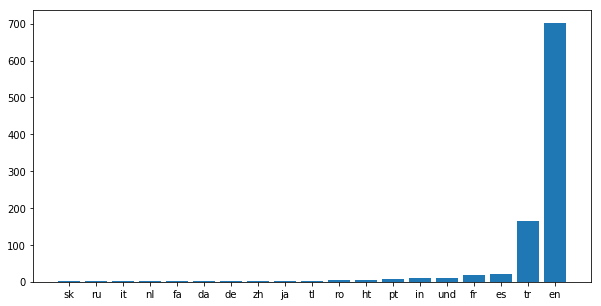

In [8]:
pipeline = [
    {'$group': {'_id': '$lang', 'count': {'$sum': 1}}},
    {'$sort': {'count': 1}}
]
tweets_by_lang = collection.aggregate(pipeline)
data = pd.DataFrame(list(tweets_by_lang))

plt.figure(figsize=(10, 5))
plt.bar(data['_id'], data['count'])
plt.show()

#### Tweets agrupados por fuente

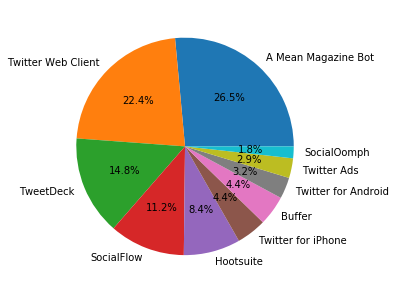

In [9]:
pipeline = [
    {'$group': 
      {
        '_id': {'$arrayElemAt': [{'$split': [{'$arrayElemAt': [{'$split': ['$source', '>']}, 1]}, '<']}, 0]},
        'count': {'$sum': 1}
      }
    },
    {'$sort': {'count': -1}},
    {'$limit': 10}
]
tweets_by_source = collection.aggregate(pipeline)
data = pd.DataFrame(list(tweets_by_source))

plt.figure(figsize=(10, 5))
plt.pie(data['count'], labels=data['_id'], autopct='%1.1f%%')
plt.show()

#### Los 10 tweets más recientes

In [10]:
pipeline = [
    {'$project': 
      {
        'id': '$id_str', 'text': '$text', 'user': '$user.screen_name',
        'created_at': {'$dateFromString': {'dateString': '$created_at'}}
      }
    }, 
    {'$sort': {'created_at': -1}},
    {'$limit': 10}
]
tweets_by_date = collection.aggregate(pipeline)
data = pd.DataFrame(list(tweets_by_date), columns=['id', 'user', 'text', 'created_at'])
data

,id,user,text,created_at
0,594789566252453889,ameanmbot,RT @rvanhoepen: My @Quora answer to Is Angular...,2015-05-03 09:04:17
1,594789484916514816,ameanmbot,RT @kazuyadesse: 2件のコメント http://t.co/w6K1Dw6IJ...,2015-05-03 09:03:58
2,594789034016268288,ameanmbot,RT @haduart: Interesting #couchdb weekly http:...,2015-05-03 09:02:11
3,594788972854902784,mashable,"An affordable, real gold Apple Watch can be yo...",2015-05-03 09:01:56
4,594788791329632256,ameanmbot,RT @findmjob: Backend Devloper http://t.co/7dk...,2015-05-03 09:01:13
5,594788703018573824,ameanmbot,RT @webinara: RT: http://t.co/38hiPyvCAL #webi...,2015-05-03 09:00:52
6,594788642431852544,javacodegeeks,Testing with #Mockito - Kick-ass #Java Code Ge...,2015-05-03 09:00:37
7,594788594570686464,Inc,9 Interview Questions Ideo Asks @IlanMochari h...,2015-05-03 09:00:26
8,594788595652829184,ameanmbot,RT @webcodegeeks: A canonical web test in Node...,2015-05-03 09:00:26
9,594788522315292673,ChelseaFC,Keep up with the Blues today... http://t.co/Em...,2015-05-03 09:00:09


####  Los trending topics mundiales

In [11]:
pipeline = [
  {'$project':
     {'hashtags':
        {'$map': {
           'input': '$entities.hashtags',
           'as': 'entities',
           'in': {'$concat': ['#', '$$entities.text']}
        }},
     }
  },
  {'$unwind': '$hashtags'},
  {'$group': {'_id': '$hashtags', 'count': {'$sum': 1}}},
  {'$sort': {'count': -1}},
  {'$limit': 10}
]
trending_topics = collection.aggregate(pipeline)
data = pd.DataFrame(list(trending_topics))
data

,_id,count
0,#FCBLive,27
1,#AngularJS,21
2,#nodejs,20
3,#LFC,19
4,#EspanyolFCB,18
5,#webinar,16
6,#IWCI,16
7,#GlobalMoms,14
8,#javascript,14
9,#RedBizUK,12


#### Geolocalización de todos los usuarios

In [12]:
m = folium.Map(location=[40, 0], zoom_start=3, tiles='OpenStreetMap')
list_users = list(collection.find({'place': {'$ne': None}}))
for user in list_users:
    place = user['place']['full_name']
    place_box = user['place']['bounding_box']
    folium.GeoJson(place_box, name=place).add_to(m)
m

#### Tweets agrupados por hora

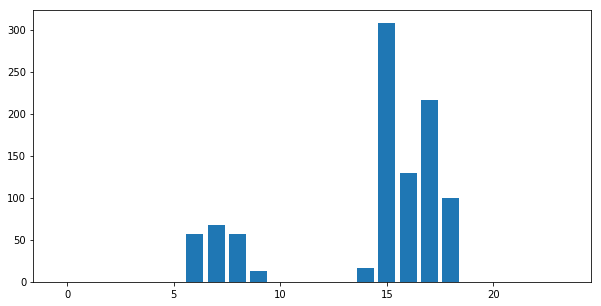

In [13]:
pipeline = [
    {'$group': 
        {
            '_id': {'$hour': {'$dateFromString': {'dateString': '$created_at'}}},
            'count': {'$sum': 1}
        }
    }
]
tweets_by_hour = collection.aggregate(pipeline)
data = {'_id': range(24), 'count': [0]*24}
for hour in list(tweets_by_hour):
    num = hour['_id']
    data['count'][num] = hour['count']

plt.figure(figsize=(10, 5))
plt.bar(data['_id'], data['count'])
plt.show()

#### Usuarios agrupados por ubicación

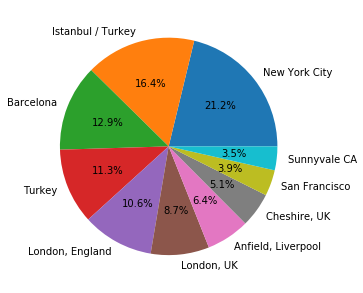

In [14]:
pipeline = [
    {'$group': {'_id': '$user.location', 'count': {'$sum': 1}}},
    {'$sort': {'count': -1}},
    {'$skip': 1},
    {'$limit': 10}
]
tweets_by_lang = collection.aggregate(pipeline)
data = pd.DataFrame(list(tweets_by_lang))

plt.figure(figsize=(10, 5))
plt.pie(data['count'], labels=data['_id'], autopct='%1.1f%%')
plt.show()

#### Mostrar la respuesta de un tweet

In [15]:
tweet_reply = collection.find_one({'in_reply_to_status_id': {'$ne': None}})
tweet = collection.find_one({'id_str': tweet_reply['in_reply_to_status_id_str']})
print(tweet['text'], '-', tweet['user']['name'])
print(tweet['created_at'])
print('|')
print('|', tweet_reply['text'], '-', tweet_reply['user']['name'])
print('|', tweet_reply['created_at'])

When your kid got her shoes wet and you don't have spare ones. http://t.co/2udr4N5WyZ - Ivan Sagalaev
Sun Apr 26 17:20:18 +0000 2015
|
| (or is it "haven't got a spare"?) - Ivan Sagalaev
| Sun Apr 26 17:32:14 +0000 2015
